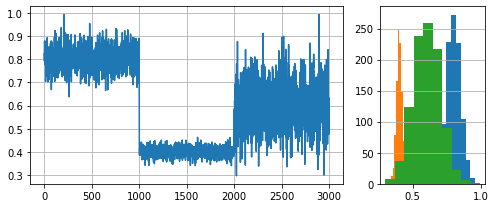

In [8]:
## Tutorial from river.xyz

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, .1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)


Change detected at index 1055
Change detected at index 2079


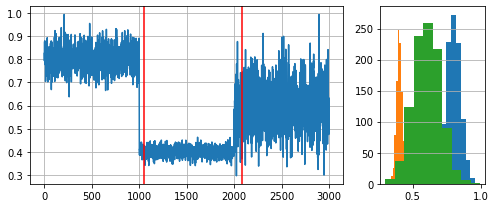

In [9]:
#!pip install river
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

In [ ]:
#model.forecast()


In [ ]:
# apply classifyer to stream with drift


In [ ]:
from river.drift import DDM
ddm = DDM()

## Here we need a binary classifier working on our data.
error_stream = np.random.randint(2, size=2000) # here we simulate the ERROR of our classifier. 
error_stream[1000:1200] = [np.random.binomial(1, .8) for _ in range(200)] ## Increase in error rate

for i, val in enumerate(error_stream):
  in_drift, in_warning = ddm.update(val)
  if in_drift:
    print(f"Change detected at index {i}, input value: {val}")


Change detected at index 1164, input value: 1
